In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')
sns.set(font_scale=1.5)

# 한글 사용 준비
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [13]:
gs_data = pd.read_excel('data/gsretail/gsretail_data.xlsx', sheet_name='종합테이블(TB_DD_STR_PURCH_CLS)', parse_dates=['OPER_DT'])

In [14]:
gs_data.head(10)

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,2019-02-01,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637
1,2019-02-01,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913
2,2019-02-01,대구광역시,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697
3,2019-02-01,대구광역시,수성구,두산동,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000
4,2019-02-01,대구광역시,수성구,만촌1동,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719
5,2019-02-01,대구광역시,수성구,만촌3동,0.917981,0.399725,0.229826,0.283445,0.022180,0.038551,0.008358,0.013903,0.004011
6,2019-02-01,대구광역시,수성구,범물1동,0.755404,0.362440,0.181022,0.359936,0.027116,0.054657,0.007843,0.005133,0.001852
7,2019-02-01,대구광역시,수성구,범물2동,1.049858,0.247451,0.177911,0.263943,0.259805,0.042777,0.001234,0.005709,0.001170
8,2019-02-01,대구광역시,수성구,범어1동,1.078317,0.315212,0.167777,0.391246,0.016445,0.092691,0.001152,0.012200,0.003278
9,2019-02-01,대구광역시,수성구,범어2동,1.060786,0.427666,0.195914,0.270228,0.024508,0.067983,0.000000,0.010088,0.003612


10 식사   
20 간식   
30 마실거리   
40 홈, 리빙   
50 헬스, 뷰티   
60 취미,여가활동   
70 사회활동   
80 임신,육아   
90 기호품

In [15]:
gs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14460 entries, 0 to 14459
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OPER_DT    14460 non-null  datetime64[ns]
 1   PVN        14460 non-null  object        
 2   BOR        14460 non-null  object        
 3   ADMD       14460 non-null  object        
 4   AMT_IND    14460 non-null  float64       
 5   LCLS_10_P  14460 non-null  float64       
 6   LCLS_20_P  14460 non-null  float64       
 7   LCLS_30_P  14460 non-null  float64       
 8   LCLS_40_P  14460 non-null  float64       
 9   LCLS_50_P  14460 non-null  float64       
 10  LCLS_60_P  14460 non-null  float64       
 11  LCLS_70_P  14460 non-null  float64       
 12  LCLS_80_P  14460 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(3)
memory usage: 1.4+ MB


In [17]:
gs_data.rename(columns = {'LCLS_10_P' : '식사', 'LCLS_20_P' : '간식', 'LCLS_30_P' : '마실거리', 'LCLS_40_P' : '홈&리빙', 
                          'LCLS_50_P':'헬스&뷰티','LCLS_60_P':'취미&여가', 'LCLS_70_P':'사회활동', 'LCLS_80_P':'임신&육아', 'LCLS_90_P':'기호품'}, inplace=True)

In [21]:
gs_data['year'] = gs_data['OPER_DT'].dt.year
gs_data['month'] = gs_data['OPER_DT'].dt.month
gs_data['day'] = gs_data['OPER_DT'].dt.day
gs_data.head()

,OPER_DT,PVN,BOR,ADMD,AMT_IND,식사,간식,마실거리,홈&리빙,헬스&뷰티,취미&여가,사회활동,임신&육아,year,month,day
0,2019-02-01,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637,2019,2,1
1,2019-02-01,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913,2019,2,1
2,2019-02-01,대구광역시,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697,2019,2,1
3,2019-02-01,대구광역시,수성구,두산동,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000,2019,2,1
4,2019-02-01,대구광역시,수성구,만촌1동,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719,2019,2,1


In [22]:
def create_year_month(OPER_DT):
    return '{0}-{1}'.format(OPER_DT.year, OPER_DT.month)

gs_data['year_month'] = gs_data['OPER_DT'].apply(create_year_month)

In [23]:
gs_data.head()

,OPER_DT,PVN,BOR,ADMD,AMT_IND,식사,간식,마실거리,홈&리빙,헬스&뷰티,취미&여가,사회활동,임신&육아,year,month,day,year_month
0,2019-02-01,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637,2019,2,1,2019-2
1,2019-02-01,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913,2019,2,1,2019-2
2,2019-02-01,대구광역시,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697,2019,2,1,2019-2
3,2019-02-01,대구광역시,수성구,두산동,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000,2019,2,1,2019-2
4,2019-02-01,대구광역시,수성구,만촌1동,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719,2019,2,1,2019-2


In [28]:
gs_data.describe()

,AMT_IND,식사,간식,마실거리,홈&리빙,헬스&뷰티,취미&여가,사회활동,임신&육아,year,month,day
count,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000
mean,1.029232,0.318673,0.221582,0.352151,0.028542,0.060371,0.005690,0.008336,0.004656,2019.502075,3.526971,15.580913
std,0.335291,0.049157,0.049851,0.046190,0.018797,0.036065,0.007226,0.006580,0.005068,0.500013,1.112165,8.723018
min,0.227434,0.121639,0.078679,0.153837,-0.078816,-0.004535,-0.014547,-0.030084,-0.003823,2019.000000,2.000000,1.000000
25%,0.793403,0.286629,0.191634,0.322394,0.017490,0.038836,0.002087,0.003832,0.001794,2019.000000,3.000000,8.000000
50%,0.957419,0.317641,0.214793,0.351581,0.025051,0.052078,0.004399,0.007251,0.003378,2020.000000,4.000000,16.000000
75%,1.183292,0.349231,0.241384,0.382045,0.035051,0.070616,0.007269,0.011384,0.005844,2020.000000,5.000000,23.000000
max,4.225786,0.579211,0.622538,0.514387,0.349770,0.529759,0.176898,0.197056,0.113993,2020.000000,5.000000,31.000000


# 카테고리 별 2019, 2020년 비중변화

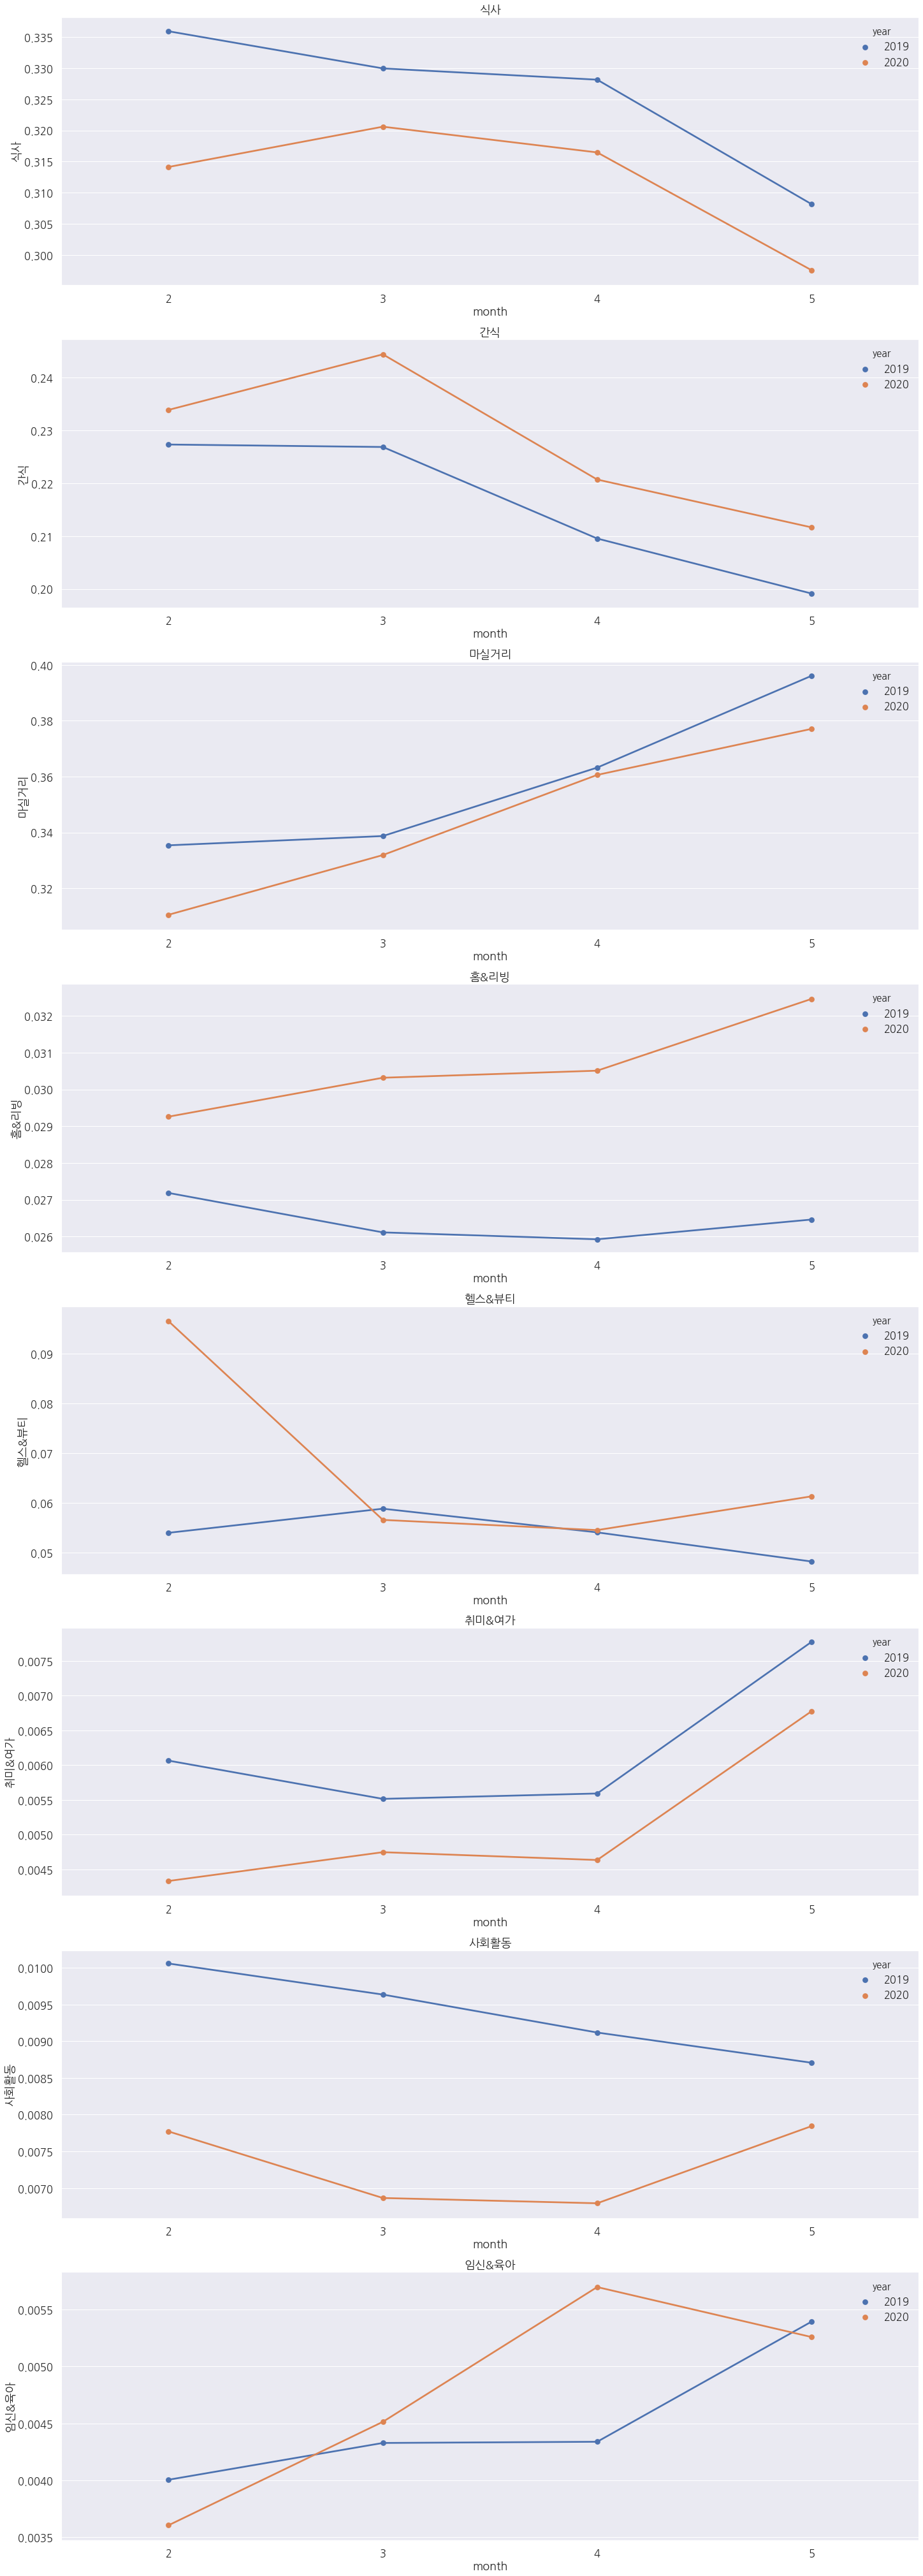

In [43]:
fig, ax = plt.subplots(8,1,figsize=(20,56),constrained_layout=True)

sns.pointplot(data=gs_data, x='month', y='식사', hue='year', ci=None, ax=ax[0])
ax[0].set(title='식사')
sns.pointplot(data=gs_data, x='month', y='간식', hue='year', ci=None, ax=ax[1])
ax[1].set(title='간식')
sns.pointplot(data=gs_data, x='month', y='마실거리',  hue='year', ci=None, ax=ax[2])
ax[2].set(title='마실거리')
sns.pointplot(data=gs_data, x='month', y='홈&리빙',  hue='year', ci=None, ax=ax[3])
ax[3].set(title='홈&리빙')
sns.pointplot(data=gs_data, x='month', y='헬스&뷰티',  hue='year', ci=None, ax=ax[4])
ax[4].set(title='헬스&뷰티')
sns.pointplot(data=gs_data, x='month', y='취미&여가',  hue='year', ci=None, ax=ax[5])
ax[5].set(title='취미&여가')
sns.pointplot(data=gs_data, x='month', y='사회활동',  hue='year', ci=None, ax=ax[6])
ax[6].set(title='사회활동')
sns.pointplot(data=gs_data, x='month', y='임신&육아',  hue='year', ci=None, ax=ax[7])
ax[7].set(title='임신&육아')

plt.show()

### 2019년 대비 2020년에 간식, 홈&리빙이 증가했다는 것을 알 수 있다

# 매출지수 2019, 2020년 비교

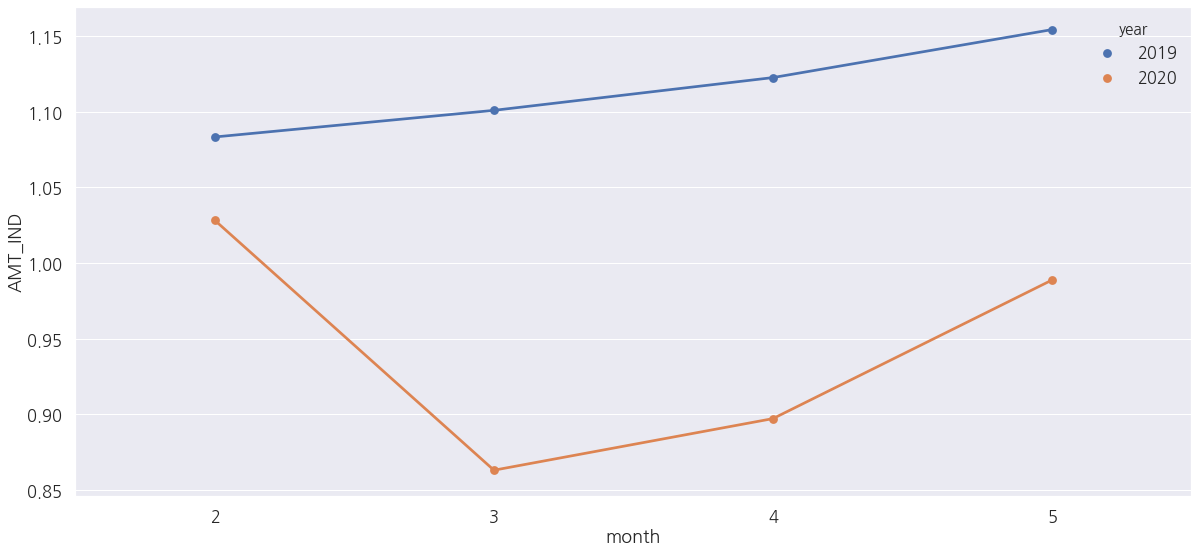

In [44]:
fig, ax = plt.subplots(figsize=(20,9))

sns.pointplot(data=gs_data, x='month', y='AMT_IND', hue='year', ax=ax, ci=None)

plt.show()

### 매출지수는 3월에 큰폭으로 감소 했다가 점점 오르는 추세를 보이고 있다